In [4]:
import cv2
from ponyslayer.utils import imshow, imshows, imdraw, imdraws, imdraws_color, immask, immasks, implot
import numpy as np
import imutils
from ponyslayer.unicorn import rotate_image

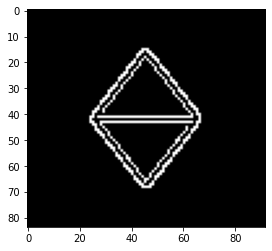

In [13]:
visualize = False
template_original = cv2.imread("Start3.png")
template_original = cv2.cvtColor(template_original, cv2.COLOR_BGR2GRAY)
template_original = cv2.Canny(template_original, 50, 200)
(tH, tW) = template_original.shape[:2]
imshow(template_original)

(18170042.0, (424, 13), 1.0)


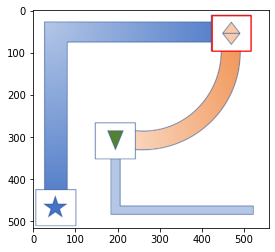

In [14]:
image = cv2.imread("Picture1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None
for rotation in range(0, 359, 5):
    resized = image
    template = rotate_image(template_original, rotation)
    # resized = rotate_image(image, rotation)
    r = gray.shape[1] / float(resized.shape[1])
    if resized.shape[0] < tH or resized.shape[1] < tW: # if the resized image is smaller than the template, then break from the loop
        break
    # detect edges in the resized, grayscale image and apply template
	# matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    # print(maxVal)
    if visualize:
        clone = np.dstack([edged, edged, edged])
        cv2.rectangle(clone, (maxLoc[0], maxLoc[1]), (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
        cv2.imshow("Template", template)
        cv2.imshow("Visualize", clone)
        cv2.waitKey(10)
	# if we have found a new maximum correlation value, then update
	# the bookkeeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
# unpack the bookkeeping variable and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
print(found)
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
imshow(image)